In [1]:
import pandas as pd
import collections
from sklearn import preprocessing
from sklearn import metrics
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import sklearn.metrics as metrics
import statsmodels.api as sm
from scipy import stats
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
from imblearn.over_sampling import SMOTE 
from sklearn import svm

Using TensorFlow backend.


In [2]:
import pandas as pd
import collections
from sklearn import preprocessing
from sklearn import metrics
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from scipy import stats
import seaborn as sns
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = set(stopwords.words("english"))
from nltk.stem.porter import PorterStemmer
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
import spacy


from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics import log_loss,confusion_matrix,classification_report,roc_curve,auc

import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from scipy import sparse
%matplotlib inline


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\liewm\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\liewm\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\liewm\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [3]:
train_data =pd.read_csv(r'C:\Users\liewm\Documents\BT4240 Machine Learning\Project\donorsnlp1.csv')
train_data=train_data.drop(columns=['Unnamed: 0'])
train_data.head(2)

C:\Users\liewm\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (0,58,59,60) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,teacher_id,teacher_prefix,school_state,project_submitted_datetime,project_grade_category,project_subject_categories,project_subject_subcategories,project_title,project_essay_1,...,res_cat_Classroom Basics,res_cat_Educational Kits & Games,res_cat_Sports & Exercise Equipment,res_cat_Musical Instruments,res_cat_Art Supplies,res_cat_Lab Equipment,res_cat_Visitors,Combined Project Essay,essay_processed,need_processed
0,p039565,df72a3ba8089423fa8a94be88060f6ed,Mrs.,GA,2017-04-26 15:57:28,Grades 3-5,"Counter({'Music & The Arts': 1, 'Health & Spor...","Counter({'Performing Arts': 1, 'Team Sports': 1})",Keep Calm and Dance On,Our elementary school is a culturally rich sch...,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Our elementary school is a culturally rich sch...,elementary school rich school diverse populati...,student need matching shirt wear dance perform...
1,p063374,403c6783e9286e51ab318fba40f8d729,Mrs.,DE,2016-11-05 10:01:51,Grades PreK-2,"Counter({'Applied Learning': 1, 'Literacy & La...","Counter({'Character Education': 1, 'Literature...",Need to Reach Our Virtual Mentors!!!,My kids tell me each day that they want to mak...,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,My kids tell me each day that they want to mak...,kid tell day want make happy teacher respectfu...,student need tablet order communicate virtual ...


## Feature Selection

In [4]:
train_data.columns

Index(['id', 'teacher_id', 'teacher_prefix', 'school_state',
       'project_submitted_datetime', 'project_grade_category',
       'project_subject_categories', 'project_subject_subcategories',
       'project_title', 'project_essay_1', 'project_essay_2',
       'project_essay_3', 'project_essay_4', 'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'project_is_approved',
       'description', 'total_cost', 'Project Resource Category',
       'Project Need Statement', 'proj_cat_Music & The Arts',
       'proj_cat_Health & Sports', 'proj_cat_Applied Learning',
       'proj_cat_Literacy & Language', 'proj_cat_Math & Science',
       'proj_cat_Special Needs', 'proj_cat_History & Civics',
       'proj_cat_Warmth', 'proj_cat_Care & Hunger',
       'proj_sub_cat_Performing Arts', 'proj_sub_cat_Team Sports',
       'proj_sub_cat_Character Education', 'proj_sub_cat_Literature & Writing',
       'proj_sub_cat_Mathematics', 'proj_sub_cat_Literacy',
       'proj_su

In [5]:
train_df = train_data.select_dtypes(exclude=['object','category'])
print(len(train_df.columns))
print(train_df.dtypes.unique())
cat_columns = [col for col in train_df.columns if 'cat' in col]
train_df.columns

54
[dtype('float64')]


Index(['teacher_number_of_previously_posted_projects', 'project_is_approved',
       'total_cost', 'proj_cat_Music & The Arts', 'proj_cat_Health & Sports',
       'proj_cat_Applied Learning', 'proj_cat_Literacy & Language',
       'proj_cat_Math & Science', 'proj_cat_Special Needs',
       'proj_cat_History & Civics', 'proj_cat_Warmth',
       'proj_cat_Care & Hunger', 'proj_sub_cat_Performing Arts',
       'proj_sub_cat_Team Sports', 'proj_sub_cat_Character Education',
       'proj_sub_cat_Literature & Writing', 'proj_sub_cat_Mathematics',
       'proj_sub_cat_Literacy', 'proj_sub_cat_Early Development',
       'proj_sub_cat_Environmental Science', 'proj_sub_cat_Health & Wellness',
       'proj_sub_cat_Music', 'proj_sub_cat_Applied Sciences',
       'proj_sub_cat_Visual Arts', 'proj_sub_cat_ESL',
       'proj_sub_cat_Extracurricular', 'proj_sub_cat_Gym & Fitness',
       'proj_sub_cat_History & Geography',
       'proj_sub_cat_College & Career Prep',
       'proj_sub_cat_Health & Life

In [6]:
train_df=train_df.fillna(0)

In [7]:
train_df['essay']=train_data['essay_processed']

In [8]:
train_df.isnull().any()

teacher_number_of_previously_posted_projects    False
project_is_approved                             False
total_cost                                      False
proj_cat_Music & The Arts                       False
proj_cat_Health & Sports                        False
proj_cat_Applied Learning                       False
proj_cat_Literacy & Language                    False
proj_cat_Math & Science                         False
proj_cat_Special Needs                          False
proj_cat_History & Civics                       False
proj_cat_Warmth                                 False
proj_cat_Care & Hunger                          False
proj_sub_cat_Performing Arts                    False
proj_sub_cat_Team Sports                        False
proj_sub_cat_Character Education                False
proj_sub_cat_Literature & Writing               False
proj_sub_cat_Mathematics                        False
proj_sub_cat_Literacy                           False
proj_sub_cat_Early Developme

In [9]:
train_df[cat_columns] = train_df[cat_columns].astype('int8')
train_df.head(3)

,teacher_number_of_previously_posted_projects,project_is_approved,total_cost,proj_cat_Music & The Arts,proj_cat_Health & Sports,proj_cat_Applied Learning,proj_cat_Literacy & Language,proj_cat_Math & Science,proj_cat_Special Needs,proj_cat_History & Civics,...,res_cat_Desks & Storage,res_cat_Instructional Technology,res_cat_Classroom Basics,res_cat_Educational Kits & Games,res_cat_Sports & Exercise Equipment,res_cat_Musical Instruments,res_cat_Art Supplies,res_cat_Lab Equipment,res_cat_Visitors,essay
0,1.0,0.0,400.00,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,elementary school rich school diverse populati...
1,0.0,1.0,727.36,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,kid tell day want make happy teacher respectfu...
2,13.0,1.0,319.80,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,seventh grader dream big wait college dream co...


In [10]:
train_df['teacher_number_of_previously_posted_projects']=train_df['teacher_number_of_previously_posted_projects'].astype('int8')
train_df['project_is_approved']=train_df['project_is_approved'].astype('int8')


In [11]:
X = train_df.loc[:, train_df.columns != 'project_is_approved']
y = train_df.loc[:, train_df.columns == 'project_is_approved']
print(X.shape)
print(y.shape)

print(type(y))
print("Number of features: {}".format(len(X.columns)))

(93791, 54)
(93791, 1)
<class 'pandas.core.frame.DataFrame'>
Number of features: 54


### Normalize numerical features

In [12]:
# standardize numeric features: teacher_number_of_previously_posted_projects, total_cost
scaler = preprocessing.MinMaxScaler()
stand_cols = ['teacher_number_of_previously_posted_projects', 'total_cost']
for col_name in stand_cols:
    X[col_name] = scaler.fit_transform(X[col_name].values.reshape(-1,1))

C:\Users\liewm\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\liewm\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [13]:
X.describe()

,teacher_number_of_previously_posted_projects,total_cost,proj_cat_Music & The Arts,proj_cat_Health & Sports,proj_cat_Applied Learning,proj_cat_Literacy & Language,proj_cat_Math & Science,proj_cat_Special Needs,proj_cat_History & Civics,proj_cat_Warmth,...,res_cat_Reading Nooks,res_cat_Desks & Storage,res_cat_Instructional Technology,res_cat_Classroom Basics,res_cat_Educational Kits & Games,res_cat_Sports & Exercise Equipment,res_cat_Musical Instruments,res_cat_Art Supplies,res_cat_Lab Equipment,res_cat_Visitors
count,93791.000000,93791.000000,93791.000000,93791.000000,93791.000000,93791.000000,93791.000000,93791.000000,93791.000000,93791.000000,...,93791.000000,93791.000000,93791.000000,93791.000000,93791.000000,93791.0,93791.0,93791.000000,93791.0,93791.000000
mean,0.534858,0.037883,0.100809,0.121611,0.110778,0.484940,0.375782,0.121568,0.051018,0.015822,...,0.000032,0.000032,0.000053,0.000032,0.000011,0.0,0.0,0.000021,0.0,0.000032
std,0.083373,0.038686,0.301078,0.326838,0.313859,0.499776,0.484327,0.326788,0.220035,0.124789,...,0.005656,0.005656,0.007301,0.005656,0.003265,0.0,0.0,0.004618,0.0,0.005656
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000
25%,0.501961,0.016981,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000
50%,0.509804,0.027980,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000
75%,0.537255,0.047296,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,0.0,1.000000,0.0,1.000000


In [14]:
import numpy as np
X=X.replace(np.nan, '', regex=True)
X.isnull().any()

teacher_number_of_previously_posted_projects    False
total_cost                                      False
proj_cat_Music & The Arts                       False
proj_cat_Health & Sports                        False
proj_cat_Applied Learning                       False
proj_cat_Literacy & Language                    False
proj_cat_Math & Science                         False
proj_cat_Special Needs                          False
proj_cat_History & Civics                       False
proj_cat_Warmth                                 False
proj_cat_Care & Hunger                          False
proj_sub_cat_Performing Arts                    False
proj_sub_cat_Team Sports                        False
proj_sub_cat_Character Education                False
proj_sub_cat_Literature & Writing               False
proj_sub_cat_Mathematics                        False
proj_sub_cat_Literacy                           False
proj_sub_cat_Early Development                  False
proj_sub_cat_Environmental S

## SMOTE Sampling

In [15]:
from imblearn.pipeline import make_pipeline
from imblearn.over_sampling import SMOTE

In [16]:
def tfidf(col,ngrams = 1):

    df_temp = X.copy(deep = True)
    
    tfidf_vectorizer = TfidfVectorizer(ngram_range=(1, ngrams))
    tfidf_vectorizer.fit(df_temp[col])

    list_corpus = df_temp[col].tolist()
    list_labels = y['project_is_approved'].tolist()

    X_tvec = tfidf_vectorizer.transform(list_corpus)
    
    return X_tvec, list_labels

In [17]:
train_df.index.shape[0]

93791

In [18]:
df = X[X.columns[:-1]]
df.head(1)

,teacher_number_of_previously_posted_projects,total_cost,proj_cat_Music & The Arts,proj_cat_Health & Sports,proj_cat_Applied Learning,proj_cat_Literacy & Language,proj_cat_Math & Science,proj_cat_Special Needs,proj_cat_History & Civics,proj_cat_Warmth,...,res_cat_Reading Nooks,res_cat_Desks & Storage,res_cat_Instructional Technology,res_cat_Classroom Basics,res_cat_Educational Kits & Games,res_cat_Sports & Exercise Equipment,res_cat_Musical Instruments,res_cat_Art Supplies,res_cat_Lab Equipment,res_cat_Visitors
0,0.505882,0.029534,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [34]:
df.columns

Index(['teacher_number_of_previously_posted_projects', 'total_cost',
       'proj_cat_Music & The Arts', 'proj_cat_Health & Sports',
       'proj_cat_Applied Learning', 'proj_cat_Literacy & Language',
       'proj_cat_Math & Science', 'proj_cat_Special Needs',
       'proj_cat_History & Civics', 'proj_cat_Warmth',
       'proj_cat_Care & Hunger', 'proj_sub_cat_Performing Arts',
       'proj_sub_cat_Team Sports', 'proj_sub_cat_Character Education',
       'proj_sub_cat_Literature & Writing', 'proj_sub_cat_Mathematics',
       'proj_sub_cat_Literacy', 'proj_sub_cat_Early Development',
       'proj_sub_cat_Environmental Science', 'proj_sub_cat_Health & Wellness',
       'proj_sub_cat_Music', 'proj_sub_cat_Applied Sciences',
       'proj_sub_cat_Visual Arts', 'proj_sub_cat_ESL',
       'proj_sub_cat_Extracurricular', 'proj_sub_cat_Gym & Fitness',
       'proj_sub_cat_History & Geography',
       'proj_sub_cat_College & Career Prep',
       'proj_sub_cat_Health & Life Science', 'proj_sub_ca

## Logistic Regression 
### Features : 
1) Cost 
<br>2) Number of previously posted projects 
<br>3) Project Category 
<br>4) Project Subcategory 
<br>5) Project Resource Category 
<br>6) TF-IDF of project essays 

In [23]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn import preprocessing, metrics, model_selection
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix
from sklearn.metrics import log_loss
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score

def training_logreg(X_train_log, X_test_log, y_train_log, y_test_log, preproc):
    
    folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 40)
    clf = LogisticRegressionCV(cv = folds, max_iter=10000,solver = 'lbfgs', multi_class = 'multinomial', n_jobs = -1)
    #Fit training dataset
    clf.fit(X_train_log, y_train_log)
    # Accuracy on validation dataset 
    model_lr = LogisticRegression(random_state=40, max_iter=10000, solver='lbfgs',multi_class='multinomial')
    validation_df = model_selection.cross_val_score(model_lr, X_train_log, y_train_log, cv=5)
    
    
    res = pd.DataFrame(columns = ['Preprocessing', 'Model', 'Precision', 'Recall', 'F1-score', 'Testing Accuracy', 'Training Accuracy'])
    
    y_pred_training=clf.predict(X_train_log)
    y_pred = clf.predict(X_test_log)
    
    f1 = f1_score(y_pred, y_test_log, average = 'weighted')
    pres = precision_score(y_pred, y_test_log, average = 'weighted')
    rec = recall_score(y_pred, y_test_log, average = 'weighted')
    acc = accuracy_score(y_pred, y_test_log)#compare output of x_test prediction with actual output 
    training_acc=accuracy_score(y_pred_training, y_train_log)#compare output of x_train with y_train 

    res = res.append({'Preprocessing': preproc, 'Model': f'Logistic Regression', 'Precision': pres, 
                     'Recall': rec, 'F1-score': f1, 'Testing Accuracy': acc, 'Training Accuracy':training_acc}, ignore_index = True)
    
    print(validation_df)
    print("Accuracy: %.5f%%" % (validation_df.mean()*100.0))
    
    #Confusion matrix 
    conf_NB = confusion_matrix(y_test_log, y_pred)    

    print("Confusion matrix:\n",conf_NB)
    
    # Plot ROC curve
    preds=clf.predict_proba(X_test_log)[:,1]
    fpr, tpr, threshold = roc_curve(y_test_log, preds)
    roc_auc = auc(fpr, tpr)
    
    #Plot ROC

    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    
    
    return res

[0.80345843 0.83189845 0.83516079 0.82956803 0.82765472]
Accuracy: 82.55481%
Confusion matrix:
 [[  449  1296]
 [ 2362 14652]]


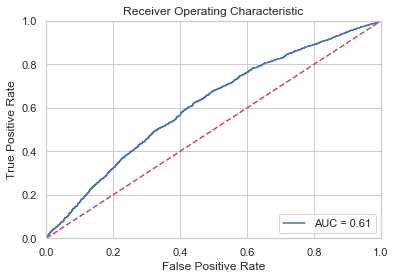

In [24]:
# DataFrame for result evaluation
from scipy.sparse import hstack, csr_matrix
smote_result = pd.DataFrame(columns = ['Preprocessing', 'Model', 'Precision', 'Recall', 'F1-score', 'Testing Accuracy', 'Training Accuracy'])

smote_over_sample = SMOTE(sampling_strategy='minority')

# Testing TF-IDF with 1-gram

Xtvec, ytvec = tfidf('essay', ngrams = 1)
traindex=df.index
X_mat = hstack([csr_matrix(df.loc[traindex,:].values),Xtvec[0:traindex.shape[0]]])

X_train, X_test, y_train, y_test = train_test_split(X_mat, ytvec, test_size=0.2, random_state=40)

X_smote_train, y_smote_train = smote_over_sample.fit_resample(X_train, y_train)

smote_result = smote_result.append(training_logreg(X_smote_train, X_test, y_smote_train, y_test, 'TF-IDF 1-grams'), ignore_index = True)



In [25]:
Xtvec[0:2]

<2x74144 sparse matrix of type '<class 'numpy.float64'>'
	with 162 stored elements in Compressed Sparse Row format>

In [26]:
smote_result

,Preprocessing,Model,Precision,Recall,F1-score,Testing Accuracy,Training Accuracy
0,TF-IDF 1-grams,Logistic Regression,0.770685,0.805,0.785341,0.805,0.997645


In [33]:
X_mat

<93791x74197 sparse matrix of type '<class 'numpy.float64'>'
	with 8513091 stored elements in COOrdinate format>

In [27]:
X_smote_train

<135894x74197 sparse matrix of type '<class 'numpy.float64'>'
	with 16037172 stored elements in Compressed Sparse Row format>

In [28]:
X_test

<18759x74197 sparse matrix of type '<class 'numpy.float64'>'
	with 1707163 stored elements in Compressed Sparse Row format>

## TFIDF Details 
- tf : We want to first calculate the term frequency : how many times a word appear in all documents. Measures the local importance of the word 
- idf : For a word to be considered a signature word of a document, it shouldn’t appear that often in the other documents. Thus, a signature word’s document frequency must be low, meaning its inverse document frequency must be high. 
- The tf-idf is the product of these two frequencies
<br>
- For a word to have high tf-idf in a document, it must appear a lot of times in said document and must be absent in the other documents. It must be a signature word of the document.

In [75]:
docs=X.essay 
docs

0        elementary school rich school diverse populati...
1        kid tell day want make happy teacher respectfu...
2        seventh grader dream big wait college dream co...
3        classroom student amazing group kid love learn...
4        school locate high poverty area major city % s...
                               ...                        
93786    bless work rural grow town north houston texas...
93787    group inspire student make impact world high a...
93788    student class sixth seventh eighth grader atte...
93789    work group wonderful second grade student brig...
93790    balanced literacy mystery couple year school d...
Name: essay, Length: 93791, dtype: object

In [76]:
#Term Frequency 
#instantiate CountVectorizer()
cv=CountVectorizer()
 
# this steps generates word counts for the words in your docs
word_count_vector=cv.fit_transform(docs)
word_count_vector.shape

(93791, 74144)

In [56]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer=TfidfTransformer(smooth_idf=True,use_idf=True)
tfidf_transformer.fit(word_count_vector)
# print idf values
df_idf = pd.DataFrame(tfidf_transformer.idf_, index=cv.get_feature_names(),columns=["idf_weights"])
 
# sort ascending
df_idf.sort_values(by=['idf_weights'])

,idf_weights
student,1.006557
school,1.155347
learn,1.208808
classroom,1.392578
need,1.467057
...,...
notebooksfolder,11.755688
notebookshand,11.755688
notebooksi,11.755688
notebookspenspencil,11.755688


In [32]:
from sklearn.feature_extraction.text import TfidfVectorizer 

# settings that you use for count vectorizer will go here
tfidf_vectorizer=TfidfVectorizer(use_idf=True)
 
# just send in all your docs here
tfidf_vectorizer_vectors=tfidf_vectorizer.fit_transform(docs)

# get the first vector out (for the first document)
first_vector_tfidfvectorizer=tfidf_vectorizer_vectors[0]
 
# place tf-idf values in a pandas data frame
tfidf_df = pd.DataFrame(first_vector_tfidfvectorizer.T.todense(), index=tfidf_vectorizer.get_feature_names(), columns=["tfidf"])
tfidf_df.sort_values(by=["tfidf"],ascending=False)
 

,tfidf
dance,0.294700
creativelyas,0.244434
adultswe,0.230022
population,0.204819
introvert,0.203973
...,...
fraction,0.000000
fractal,0.000000
fracke,0.000000
fps,0.000000


In [34]:
feature_names =  tfidf_vectorizer.get_feature_names()
docs=X.essay
corpus_index = [n for n in docs[0:1]]

tfs = tfidf_vectorizer.fit_transform(docs[0:1])
temp = pd.DataFrame(tfs.T.todense(), index=feature_names, columns=corpus_index)
print(temp)

          elementary school rich school diverse population student pre - k sixth title school population % student qualify free reduce price lunch high concentration english learner serve foster group home temporary long term placement homeless child see statistic road block see addition rich diversity help student develop full potential creative problem solve compassionate adultswe strive provide diverse population student extra curricular activity outlet express creativelyas teacher organize dance club low elementary meet week give girl something look foster education whole child create social environment vary cultural student body \r\n\r\nsince begin dance club watch girl introvert bloom excitement choreograph dance production content area school day
activity                                           0.079057                                                                                                                                                                                 

[81 rows x 1 columns]


In [37]:
another = pd.DataFrame(tfs.todense(), index=corpus_index, columns=feature_names)

In [54]:
another.iloc[:, 1:10]

,adultswe,area,begin,block,bloom,body,child,choreograph,club
elementary school rich school diverse population student pre - k sixth title school population % student qualify free reduce price lunch high concentration english learner serve foster group home temporary long term placement homeless child see statistic road block see addition rich diversity help student develop full potential creative problem solve compassionate adultswe strive provide diverse population student extra curricular activity outlet express creativelyas teacher organize dance club low elementary meet week give girl something look foster education whole child create social environment vary cultural student body \r\n\r\nsince begin dance club watch girl introvert bloom excitement choreograph dance production content area school day,0.079057,0.079057,0.079057,0.079057,0.079057,0.079057,0.158114,0.079057,0.158114


## 2. Multinomial Naive Bayes 
### 2.1 Without essays 

In [29]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix
from sklearn.metrics import log_loss
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn import preprocessing, metrics, model_selection
from sklearn.naive_bayes import GaussianNB
params = {}
def training_NB(X_train_log, X_test_log, y_train_log, y_test_log, preproc):
    
    folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 40)
    nb = MultinomialNB()
    clf = GridSearchCV(nb, param_grid=params,cv=folds)
    
    clf.fit(X_train_log, y_train_log)
    
    validation_df=model_selection.cross_val_score(nb, X_train_log, y_train_log, cv=5)
    
    res = pd.DataFrame(columns = ['Preprocessing', 'Model', 'Precision', 'Recall', 'F1-score', 'Testing Accuracy', 'Training Accuracy'])
    
    y_pred_training=clf.predict(X_train_log)
    y_pred = clf.predict(X_test_log)
    
    f1 = f1_score(y_pred, y_test_log, average = 'weighted')
    pres = precision_score(y_pred, y_test_log, average = 'weighted')
    rec = recall_score(y_pred, y_test_log, average = 'weighted')
    acc = accuracy_score(y_pred, y_test_log)#compare output of x_test prediction with actual output 
    training_acc=accuracy_score(y_pred_training, y_train_log)#compare output of x_train with y_train 

    res = res.append({'Preprocessing': preproc, 'Model': f'Naive Bayes', 'Precision': pres, 
                     'Recall': rec, 'F1-score': f1, 'Testing Accuracy': acc, 'Training Accuracy':training_acc}, ignore_index = True)
    
    print(validation_df)
    print("Accuracy: %.5f%%" % (validation_df.mean()*100.0))
    
    #Confusion matrix 
    conf_NB = confusion_matrix(y_test_log, y_pred)    

    print("Confusion matrix:\n",conf_NB)
    
    # Plot ROC curve
    preds=clf.predict_proba(X_test_log)[:,1]
    fpr, tpr, threshold = roc_curve(y_test_log, preds)
    roc_auc = auc(fpr, tpr)
    
    #Plot ROC

    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    
    
    return res

C:\Users\liewm\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\liewm\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


[0.55103978 0.55170206 0.55746391]
Accuracy: 55.34019%
Confusion matrix:
 [[1003  742]
 [7422 9592]]


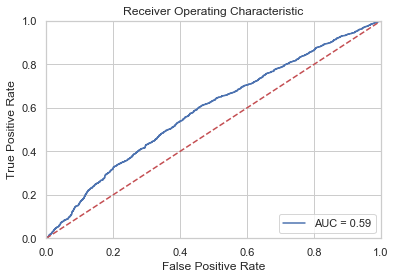

In [70]:
# DataFrame for result evaluation

# DataFrame for result evaluation
from scipy.sparse import hstack, csr_matrix
nb2_result = pd.DataFrame(columns = ['Preprocessing', 'Model', 'Precision', 'Recall', 'F1-score', 'Testing Accuracy', 'Training Accuracy'])

smote_over_sample = SMOTE(sampling_strategy='minority')

# Testing TF-IDF with 1-gram

X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2, random_state=40)

X_smote_train1, y_smote_train1 = smote_over_sample.fit_resample(X_train, y_train)

# Testing TF-IDF with 1-GRAM 
nb2_result= nb2_result.append(training_NB(X_smote_train1, X_test, y_smote_train1, y_test, 'Multinomial Naive Bayes'), ignore_index = True)



In [71]:
nb2_result

,Preprocessing,Model,Precision,Recall,F1-score,Testing Accuracy,Training Accuracy
0,Multinomial Naive Bayes,Naive Bayes,0.568718,0.564796,0.475018,0.564796,0.553336


In [36]:
# DataFrame for result evaluation

# DataFrame for result evaluation
from scipy.sparse import hstack, csr_matrix
nb2_result = pd.DataFrame(columns = ['Preprocessing', 'Model', 'Precision', 'Recall', 'F1-score', 'Testing Accuracy', 'Training Accuracy'])

smote_over_sample = SMOTE(sampling_strategy='minority')

# Testing TF-IDF with 1-gram

X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2, random_state=40)

X_smote_train1, y_smote_train1 = smote_over_sample.fit_resample(X_train, y_train)

# Testing TF-IDF with 1-GRAM 
#nb2_result= nb2_result.append(training_NB(X_smote_train1, X_test, y_smote_train1, y_test, 'Multinomial Naive Bayes'), ignore_index = True)



C:\Users\liewm\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [41]:
sum(matrix)

array([[38066, 29881],
       [30724, 37223]], dtype=int64)

confusion matrix [[7507 6083]
 [6054 7536]]
confusion matrix [[7651 5939]
 [6365 7225]]
confusion matrix [[7775 5814]
 [6209 7380]]
confusion matrix [[7408 6181]
 [5858 7731]]
confusion matrix [[7725 5864]
 [6238 7351]]


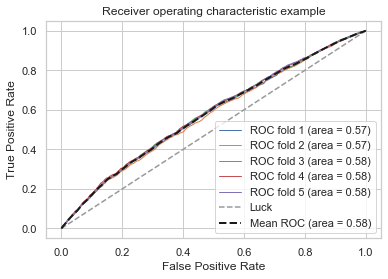

In [40]:
import numpy as np
from scipy import interp
skf = StratifiedKFold(n_splits=5,random_state=40)

mean_tpr = 0.0
mean_fpr = np.linspace(0, 1, 100)
all_tpr = []
matrix = []
i=1
nb = MultinomialNB()

for train, test in skf.split(X_smote_train1, y_smote_train1):
    train_data_x = X_smote_train1[train]
    train_data_y = y_smote_train1[train]
    val_data_X = X_smote_train1[test]
    val_data_y = y_smote_train1[test]
    clf =  nb.fit(train_data_x, train_data_y)
    probas_ = clf.predict_proba(val_data_X)
    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = metrics.roc_curve(val_data_y, probas_[:, 1])
    print("confusion matrix", metrics.confusion_matrix(val_data_y, clf.predict(val_data_X)) )
    matrix.append( metrics.confusion_matrix(val_data_y, clf.predict(val_data_X)))
    mean_tpr += interp(mean_fpr, fpr, tpr)
    mean_tpr[0] = 0.0
    roc_auc = metrics.auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=1, label='ROC fold %d (area = %0.2f)' % (i, roc_auc))
    i=i+1

plt.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6), label='Luck')

mean_tpr /= 5
mean_tpr[-1] = 1.0
mean_auc = metrics.auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, 'k--',
         label='Mean ROC (area = %0.2f)' % mean_auc, lw=2)

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

### 2.2 All features (Including essays) 

[0.72649007 0.7406181  0.74913533 0.73809699 0.7460078 ]
Accuracy: 74.00697%
Confusion matrix:
 [[ 1013   732]
 [ 5110 11904]]


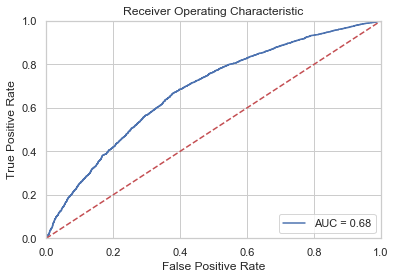

In [30]:
# DataFrame for result evaluation

# DataFrame for result evaluation
from scipy.sparse import hstack, csr_matrix
nb_result = pd.DataFrame(columns = ['Preprocessing', 'Model', 'Precision', 'Recall', 'F1-score', 'Testing Accuracy', 'Training Accuracy'])

smote_over_sample = SMOTE(sampling_strategy='minority')

# Testing TF-IDF with 1-gram

#Xtvec, ytvec = tfidf('essay', ngrams = 1)
#traindex=df.index
#X_mat = hstack([csr_matrix(df.loc[traindex,:].values),Xtvec[0:traindex.shape[0]]])

#X_train, X_test, y_train, y_test = train_test_split(X_mat, ytvec, test_size=0.2, random_state=40)

#X_smote_train, y_smote_train = smote_over_sample.fit_resample(X_train, y_train)

# Testing TF-IDF with 1-GRAM 
nb_result= nb_result.append(training_NB(X_smote_train, X_test, y_smote_train, y_test, 'TF-IDF 1-grams'), ignore_index = True)



In [31]:
nb_result

,Preprocessing,Model,Precision,Recall,F1-score,Testing Accuracy,Training Accuracy
0,TF-IDF 1-grams,Naive Bayes,0.66077,0.688576,0.624925,0.688576,0.767378


In [52]:
# Testing TF-IDF with 1-gram

Xtvec, ytvec = tfidf('essay', ngrams = 1)
traindex=df.index
X_mat = hstack([csr_matrix(df.loc[traindex,:].values),Xtvec[0:traindex.shape[0]]])

X_train, X_test, y_train, y_test = train_test_split(X_mat, ytvec, test_size=0.2, random_state=40)

X_smote_train, y_smote_train = smote_over_sample.fit_resample(X_train, y_train)


confusion matrix [[10539  3051]
 [ 4286  9304]]
confusion matrix 0.7300588668138337
confusion matrix [[10887  2703]
 [ 4388  9202]]
confusion matrix 0.7391096394407652
confusion matrix [[10994  2595]
 [ 4196  9393]]
confusion matrix 0.750128780631393
confusion matrix [[10908  2681]
 [ 4247  9342]]
confusion matrix 0.7450879387740084
confusion matrix [[10866  2723]
 [ 4231  9358]]
confusion matrix 0.7441312826550887


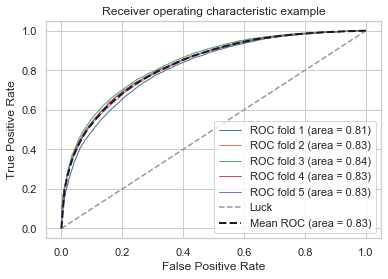

In [57]:
import numpy as np
from scipy import interp
skf = StratifiedKFold(n_splits=5,random_state=40)

mean_tpr = 0.0
mean_fpr = np.linspace(0, 1, 100)
all_tpr = []
matrix = []
i=1
nb = MultinomialNB()

for train, test in skf.split(X_smote_train, y_smote_train):
    train_data_x = X_smote_train[train]
    train_data_y = y_smote_train[train]
    val_data_X = X_smote_train[test]
    val_data_y = y_smote_train[test]
    clf =  nb.fit(train_data_x, train_data_y)
    probas_ = clf.predict_proba(val_data_X)
    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = metrics.roc_curve(val_data_y, probas_[:, 1])
    print("confusion matrix", metrics.confusion_matrix(val_data_y, clf.predict(val_data_X)) )
    print("confusion matrix", metrics.accuracy_score(val_data_y, clf.predict(val_data_X)) )
    
    matrix.append( metrics.confusion_matrix(val_data_y, clf.predict(val_data_X)))
    mean_tpr += interp(mean_fpr, fpr, tpr)
    mean_tpr[0] = 0.0
    roc_auc = metrics.auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=1, label='ROC fold %d (area = %0.2f)' % (i, roc_auc))
    i=i+1

plt.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6), label='Luck')

mean_tpr /= 5
mean_tpr[-1] = 1.0
mean_auc = metrics.auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, 'k--',
         label='Mean ROC (area = %0.2f)' % mean_auc, lw=2)

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [58]:
sum(matrix)

array([[54194, 13753],
       [21348, 46599]], dtype=int64)

C:\Users\liewm\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


confusion matrix [[10603  2987]
 [ 3118 10472]]
confusion matrix 0.7753863134657837
confusion matrix [[11486  2104]
 [ 3236 10354]]
confusion matrix 0.8035320088300221
confusion matrix [[11554  2035]
 [ 3166 10423]]
confusion matrix 0.8086319817499448
confusion matrix [[11456  2133]
 [ 3162 10427]]
confusion matrix 0.8051733019353889
confusion matrix [[11444  2145]
 [ 3166 10423]]
confusion matrix 0.8045845904775921


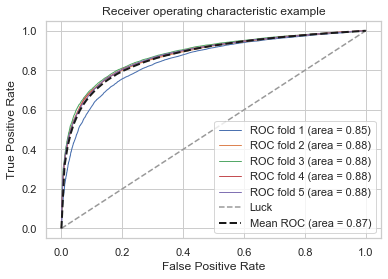

In [55]:
import numpy as np
from scipy import interp
skf = StratifiedKFold(n_splits=5,random_state=40)

mean_tpr = 0.0
mean_fpr = np.linspace(0, 1, 100)
all_tpr = []
matrix = []
i=1

lr=LogisticRegression()

for train, test in skf.split(X_smote_train, y_smote_train):
    train_data_x = X_smote_train[train]
    train_data_y = y_smote_train[train]
    val_data_X = X_smote_train[test]
    val_data_y = y_smote_train[test]
    clf =  lr.fit(train_data_x, train_data_y)
    probas_ = clf.predict_proba(val_data_X)
    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = metrics.roc_curve(val_data_y, probas_[:, 1])
    print("confusion matrix", metrics.confusion_matrix(val_data_y, clf.predict(val_data_X)) )
    print("confusion matrix", metrics.accuracy_score(val_data_y, clf.predict(val_data_X)) )
    matrix.append( metrics.confusion_matrix(val_data_y, clf.predict(val_data_X)))
    mean_tpr += interp(mean_fpr, fpr, tpr)
    mean_tpr[0] = 0.0
    roc_auc = metrics.auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=1, label='ROC fold %d (area = %0.2f)' % (i, roc_auc))
    i=i+1

plt.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6), label='Luck')

mean_tpr /= 5
mean_tpr[-1] = 1.0
mean_auc = metrics.auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, 'k--',
         label='Mean ROC (area = %0.2f)' % mean_auc, lw=2)

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [56]:
sum(matrix)

array([[56543, 11404],
       [15848, 52099]], dtype=int64)

## WIthout kfold 

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix
from sklearn.metrics import log_loss
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score

def training_logreg_noK(X_train_log, X_test_log, y_train_log, y_test_log, preproc):
    
    clf = LogisticRegression(solver = 'saga', multi_class = 'multinomial', n_jobs = -1)
    
    clf.fit(X_train_log, y_train_log)

    res = pd.DataFrame(columns = ['Preprocessing', 'Model', 'Precision', 'Recall', 'F1-score', 'Testing Accuracy', 'Training Accuracy'])
    
    y_pred_training=clf.predict(X_train_log)
    y_pred = clf.predict(X_test_log)
    
    f1 = f1_score(y_pred, y_test_log, average = 'weighted')
    pres = precision_score(y_pred, y_test_log, average = 'weighted')
    rec = recall_score(y_pred, y_test_log, average = 'weighted')
    acc = accuracy_score(y_pred, y_test_log)#compare output of x_test prediction with actual output 
    training_acc=accuracy_score(y_pred_training, y_train_log)#compare output of x_train with y_train 

    res = res.append({'Preprocessing': preproc, 'Model': f'Logistic Regression', 'Precision': pres, 
                     'Recall': rec, 'F1-score': f1, 'Testing Accuracy': acc, 'Training Accuracy':training_acc}, ignore_index = True)
    
    
    #Confusion matrix 
    conf_NB = confusion_matrix(y_test_log, y_pred)    

    print("Confusion matrix:\n",conf_NB)
    
    # Plot ROC curve
    preds=clf.predict_proba(X_test_log)[:,1]
    fpr, tpr, threshold = roc_curve(y_test_log, preds)
    roc_auc = auc(fpr, tpr)
    
    #Plot ROC

    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    
    
    return res

Confusion matrix:
 [[  926   819]
 [ 4085 12929]]


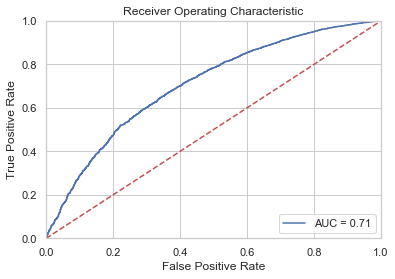

In [28]:
# DataFrame for result evaluation

result_noK = pd.DataFrame(columns = ['Preprocessing', 'Model', 'Precision', 'Recall', 'F1-score', 'Testing Accuracy', 'Training Accuracy'])

# Testing TF-IDF with 1-gram

result_noK= result_noK.append(training_logreg_noK(X_smote_train, X_test, y_smote_train, y_test, 'TF-IDF 1-grams'), ignore_index = True)



In [29]:
result_noK

,Preprocessing,Model,Precision,Recall,F1-score,Testing Accuracy,Training Accuracy
0,TF-IDF 1-grams,Logistic Regression,0.698667,0.738579,0.689268,0.738579,0.807365


In [22]:
df.head(1)

,teacher_number_of_previously_posted_projects,total_cost,proj_cat_Music & The Arts,proj_cat_Health & Sports,proj_cat_Applied Learning,proj_cat_Literacy & Language,proj_cat_Math & Science,proj_cat_Special Needs,proj_cat_History & Civics,proj_cat_Warmth,...,res_cat_Reading Nooks,res_cat_Desks & Storage,res_cat_Instructional Technology,res_cat_Classroom Basics,res_cat_Educational Kits & Games,res_cat_Sports & Exercise Equipment,res_cat_Musical Instruments,res_cat_Art Supplies,res_cat_Lab Equipment,res_cat_Visitors
0,-0.34754,-0.215827,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
df.loc[traindex,:].values

array([[-0.34754044, -0.21582737,  1.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.39457703,  0.40896252,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.21689858, -0.36889479,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 2.66280104, -0.35272919,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.96948396, -0.5251686 ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.34754044, -0.33415879,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

In [24]:
Xtvec[0:traindex.shape[0]].nonzero()

(array([    0,     0,     0, ..., 93790, 93790, 93790], dtype=int32),
 array([72056, 71651, 71285, ...,  1617,   275,   247], dtype=int32))

In [25]:
X_mat.nonzero()

(array([    0,     0,     0, ..., 93790, 93790, 93790], dtype=int32),
 array([   0,    1,    2, ..., 1670,  328,  300], dtype=int32))

In [26]:
X_mat.data

array([-0.34754044, -0.21582737,  1.        , ...,  0.14305823,
        0.1142354 ,  0.12278472])

## Logistic Regression (3 features) 
- Essays
- Cost
- Number of previously submitted projects 

In [57]:
#Modify dataset 
df2 = X[X.columns[:2]]
df2

,teacher_number_of_previously_posted_projects,total_cost
0,-0.347540,-0.215827
1,-0.394577,0.408963
2,0.216899,-0.368895
3,-0.347540,-0.784582
4,-0.253467,-0.642221
...,...,...
93786,-0.394577,0.042727
93787,-0.347540,1.365825
93788,2.662801,-0.352729
93789,0.969484,-0.525169


C:\Users\liewm\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Confusion matrix:
 [[  747   998]
 [ 3246 13768]]


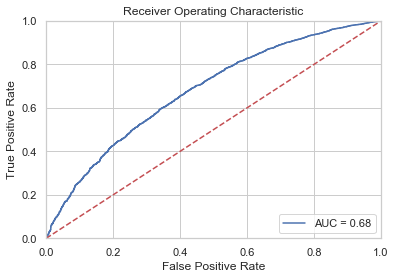

In [58]:
# DataFrame for result evaluation
from scipy.sparse import hstack, csr_matrix
smote_result = pd.DataFrame(columns = ['Preprocessing', 'Model', 'Precision', 'Recall', 'F1-score', 'Accuracy'])

smote_over_sample = SMOTE(sampling_strategy='minority')

# Testing TF-IDF with 1-gram

Xtvec, ytvec = tfidf('essay', ngrams = 1)
traindex=df2.index
X_mat = hstack([csr_matrix(df2.loc[traindex,:].values),Xtvec[0:traindex.shape[0]]])

X_train, X_test, y_train, y_test = train_test_split(X_mat, ytvec, test_size=0.2, random_state=40)

X_smote_train, y_smote_train = smote_over_sample.fit_resample(X_train, y_train)
smote_result = smote_result.append(training_logreg(X_smote_train, X_test, y_smote_train, y_test, 'TF-IDF 1-grams'), ignore_index = True)



In [59]:
smote_result

,Preprocessing,Model,Precision,Recall,F1-score,Accuracy
0,TF-IDF 1-grams,Logistic Regression,0.728088,0.773762,0.737446,0.773762


In [60]:
#Modify dataset 
df3 = X[X.columns[1:2]]
df3

,total_cost
0,-0.215827
1,0.408963
2,-0.368895
3,-0.784582
4,-0.642221
...,...
93786,0.042727
93787,1.365825
93788,-0.352729
93789,-0.525169


C:\Users\liewm\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Confusion matrix:
 [[  723  1022]
 [ 3216 13798]]


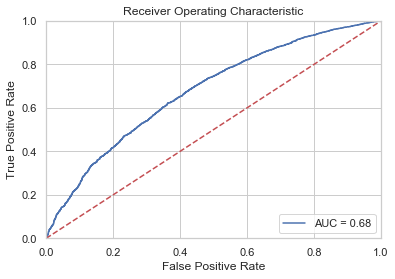

In [61]:
# DataFrame for result evaluation
from scipy.sparse import hstack, csr_matrix
smote_result = pd.DataFrame(columns = ['Preprocessing', 'Model', 'Precision', 'Recall', 'F1-score', 'Accuracy'])

smote_over_sample = SMOTE(sampling_strategy='minority')

# Testing TF-IDF with 1-gram

Xtvec, ytvec = tfidf('essay', ngrams = 1)
traindex=df3.index
X_mat = hstack([csr_matrix(df3.loc[traindex,:].values),Xtvec[0:traindex.shape[0]]])

X_train, X_test, y_train, y_test = train_test_split(X_mat, ytvec, test_size=0.2, random_state=40)

X_smote_train, y_smote_train = smote_over_sample.fit_resample(X_train, y_train)
smote_result = smote_result.append(training_logreg(X_smote_train, X_test, y_smote_train, y_test, 'TF-IDF 1-grams'), ignore_index = True)



In [62]:
smote_result

,Preprocessing,Model,Precision,Recall,F1-score,Accuracy
0,TF-IDF 1-grams,Logistic Regression,0.72769,0.774082,0.738265,0.774082


In [21]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import KFold
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix
from sklearn.metrics import log_loss
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score

def training_logreg1(X_train_log, X_test_log, y_train_log, y_test_log, preproc):
    
    folds = KFold(n_splits = 5, shuffle = True, random_state = 40)
    
    clf = LogisticRegressionCV(cv = folds, solver = 'saga', multi_class = 'multinomial', n_jobs = -1)
    
    clf.fit(X_train_log, y_train_log)

    res = pd.DataFrame(columns = ['Preprocessing', 'Model', 'Precision', 'Recall', 'F1-score', 'Testing Accuracy', 'Training Accuracy'])
    
    y_pred_training=clf.predict(X_train_log)
    y_pred = clf.predict(X_test_log)
    
    f1 = f1_score(y_pred, y_test_log, average = 'weighted')
    pres = precision_score(y_pred, y_test_log, average = 'weighted')
    rec = recall_score(y_pred, y_test_log, average = 'weighted')
    acc = accuracy_score(y_pred, y_test_log)#compare output of x_test prediction with actual output 
    training_acc=accuracy_score(y_pred_training, y_train_log)#compare output of x_train with y_train 

    res = res.append({'Preprocessing': preproc, 'Model': f'Logistic Regression', 'Precision': pres, 
                     'Recall': rec, 'F1-score': f1, 'Testing Accuracy': acc, 'Training Accuracy':training_acc}, ignore_index = True)
    
    
    #Confusion matrix 
    conf_NB = confusion_matrix(y_test_log, y_pred)    

    print("Confusion matrix:\n",conf_NB)
    
    # Plot ROC curve
    preds=clf.predict_proba(X_test_log)[:,1]
    fpr, tpr, threshold = roc_curve(y_test_log, preds)
    roc_auc = auc(fpr, tpr)
    
    #Plot ROC

    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    
    
    return res

C:\Users\liewm\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Confusion matrix:
 [[  739  1006]
 [ 3237 13777]]


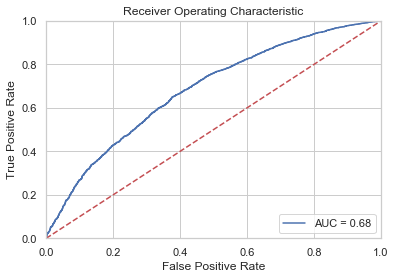

C:\Users\liewm\Anaconda3\lib\site-packages\pandas\core\frame.py:7123: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort,


In [22]:
# DataFrame for result evaluation
from scipy.sparse import hstack, csr_matrix
smote_result = pd.DataFrame(columns = ['Preprocessing', 'Model', 'Precision', 'Recall', 'F1-score', 'Testing Accuracy', 'Training Accuracy'])

smote_over_sample = SMOTE(sampling_strategy='minority')

# Testing TF-IDF with 1-gram

Xtvec, ytvec = tfidf('essay', ngrams = 1)
traindex=df.index
X_mat = hstack([csr_matrix(df.loc[traindex,:].values),Xtvec[0:traindex.shape[0]]])

X_train, X_test, y_train, y_test = train_test_split(X_mat, ytvec, test_size=0.2, random_state=40)

X_smote_train, y_smote_train = smote_over_sample.fit_resample(X_train, y_train)
smote_result = smote_result.append(training_logreg1(X_smote_train, X_test, y_smote_train, y_test, 'TF-IDF 1-grams'), ignore_index = True)



In [23]:
smote_result

,Accuracy,F1-score,Model,Precision,Preprocessing,Recall,Testing Accuracy,Training Accuracy
0,NaN,0.737648,Logistic Regression,0.727879,TF-IDF 1-grams,0.773815,0.773815,0.893998
